In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("E:\\Data Trained\\ibm-hr-analytics-employee-attrition-performance\\HR.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<AxesSubplot:>

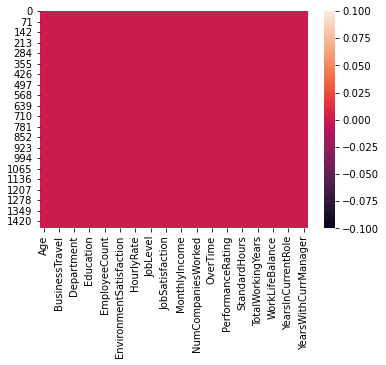

In [8]:
sn.heatmap(df.isnull())

No Null Value

# Visualization

Male      882
Female    588
Name: Gender, dtype: int64


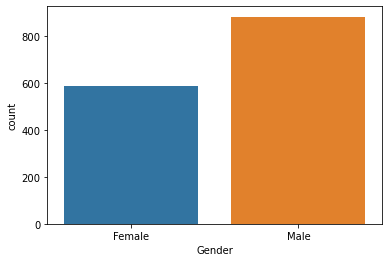

In [10]:
ax = sn.countplot(x="Gender", data=df)
print(df["Gender"].value_counts())

There are 882 male and 588 Female

No     1233
Yes     237
Name: Attrition, dtype: int64


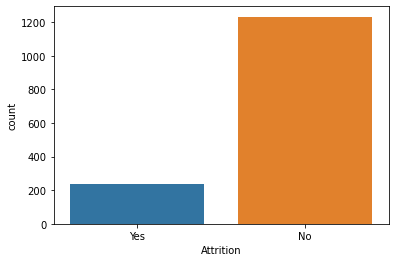

In [13]:
ax = sn.countplot(x="Attrition", data=df)
print(df["Attrition"].value_counts())

We need to balance the data

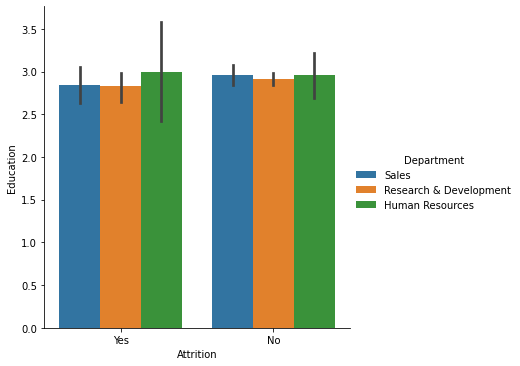

In [4]:
g=sn.catplot(x="Attrition",y="Education",hue="Department",data=df,kind="bar")
plt.show()

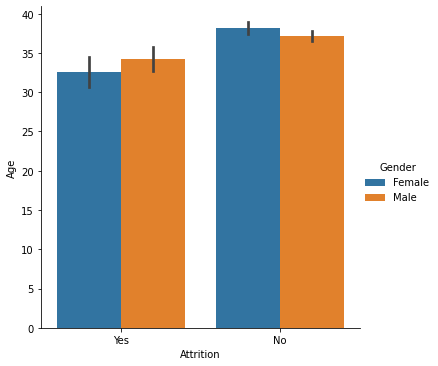

In [14]:
g=sn.catplot(x="Attrition",y="Age",hue="Gender",data=df,kind="bar")
plt.show()

Between 30-35 age the attrition rate is high in both male and female

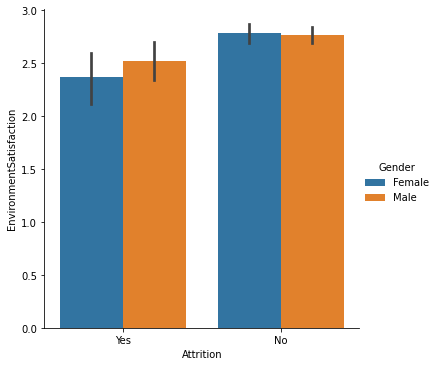

In [7]:
g=sn.catplot(x="Attrition",y="EnvironmentSatisfaction",hue="Gender",data=df,kind="bar")
plt.show()

In high Environment Satisfaction attritaion rate is high for male employee

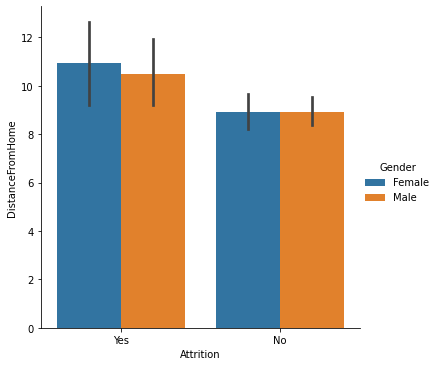

In [8]:
g=sn.catplot(x="Attrition",y="DistanceFromHome",hue="Gender",data=df,kind="bar")
plt.show()

Distance from home also effect more the attrition for both male and female

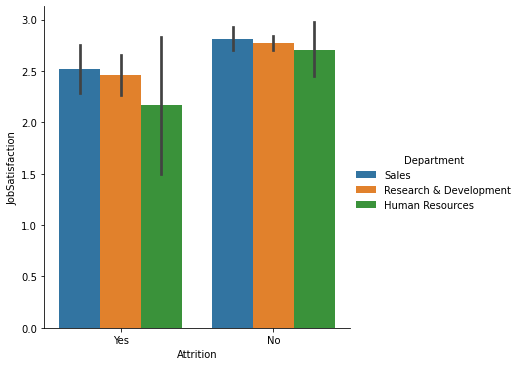

In [11]:
g=sn.catplot(x="Attrition",y="JobSatisfaction",hue="Department",data=df,kind="bar")
plt.show()

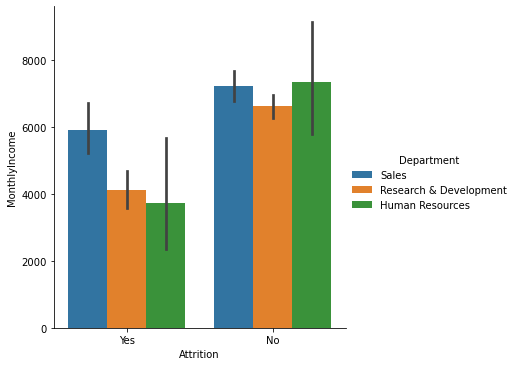

In [6]:
g=sn.catplot(x="Attrition",y="MonthlyIncome",hue="Department",data=df,kind="bar")
plt.show()

In sales depertment if monthy income is high then attrition is also high

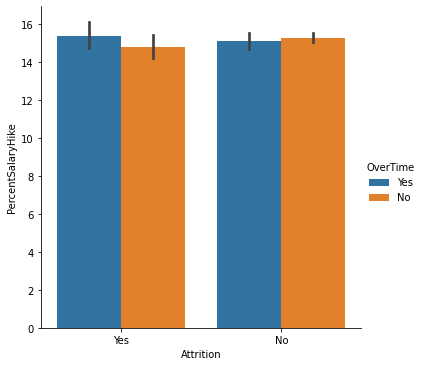

In [13]:
g=sn.catplot(x="Attrition",y="PercentSalaryHike",hue="OverTime",data=df,kind="bar")
plt.show()

Due to overtime salry also hiked but attrition is also high means less work life balance

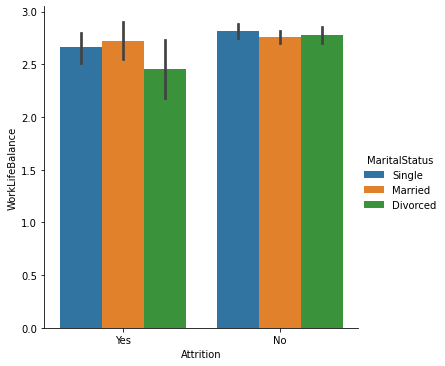

In [14]:
g=sn.catplot(x="Attrition",y="WorkLifeBalance",hue="MaritalStatus",data=df,kind="bar")
plt.show()

Married person need more work life balance

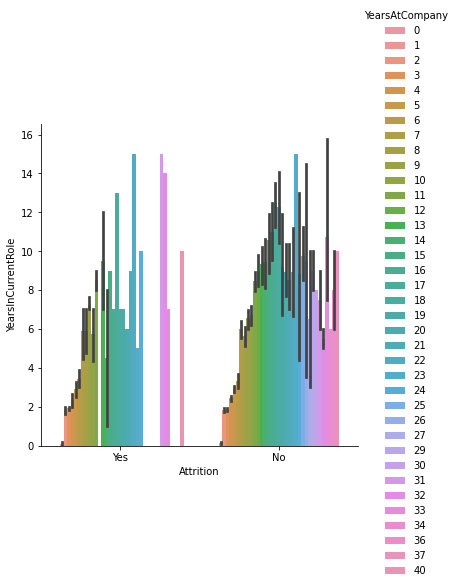

In [16]:
g=sn.catplot(x="Attrition",y="YearsInCurrentRole",hue="YearsAtCompany",data=df,kind="bar")
plt.show()

Those who are holding their current role for longtime there is tendency of leave the company mean lack of promotion.

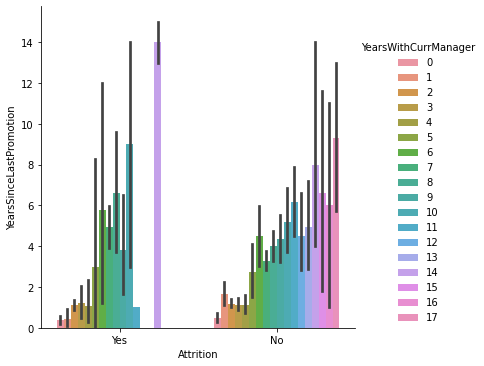

In [17]:
g=sn.catplot(x="Attrition",y="YearsSinceLastPromotion",hue="YearsWithCurrManager",data=df,kind="bar")
plt.show()

Attrition is high for those who are not getting promotion for 8 or more year and also the manager is same for almost same period of time 

# Encoding Data

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
lb=LabelEncoder()
df['Attrition']=lb.fit_transform(df['Attrition'])
df['BusinessTravel']=lb.fit_transform(df['BusinessTravel'])
df['Department']=lb.fit_transform(df['Department'])
df['EducationField']=lb.fit_transform(df['EducationField'])
df['Gender']=lb.fit_transform(df['Gender'])
df['JobRole']=lb.fit_transform(df['JobRole'])
df['Over18']=lb.fit_transform(df['Over18'])
df['OverTime']=lb.fit_transform(df['OverTime'])
df['MaritalStatus']=lb.fit_transform(df['MaritalStatus'])

In [6]:
df.dtypes

Age                         int64
Attrition                   int32
BusinessTravel              int32
DailyRate                   int64
Department                  int32
DistanceFromHome            int64
Education                   int64
EducationField              int32
EmployeeCount               int64
EmployeeNumber              int64
EnvironmentSatisfaction     int64
Gender                      int32
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int32
JobSatisfaction             int64
MaritalStatus               int32
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int32
OverTime                    int32
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesL

# Checking Outliers

Age                            AxesSubplot(0.125,0.826831;0.227941x0.053169)
Attrition                   AxesSubplot(0.398529,0.826831;0.227941x0.053169)
BusinessTravel              AxesSubplot(0.672059,0.826831;0.227941x0.053169)
DailyRate                      AxesSubplot(0.125,0.763028;0.227941x0.053169)
Department                  AxesSubplot(0.398529,0.763028;0.227941x0.053169)
DistanceFromHome            AxesSubplot(0.672059,0.763028;0.227941x0.053169)
Education                      AxesSubplot(0.125,0.699225;0.227941x0.053169)
EducationField              AxesSubplot(0.398529,0.699225;0.227941x0.053169)
EmployeeCount               AxesSubplot(0.672059,0.699225;0.227941x0.053169)
EmployeeNumber                 AxesSubplot(0.125,0.635423;0.227941x0.053169)
EnvironmentSatisfaction     AxesSubplot(0.398529,0.635423;0.227941x0.053169)
Gender                      AxesSubplot(0.672059,0.635423;0.227941x0.053169)
HourlyRate                      AxesSubplot(0.125,0.57162;0.227941x0.053169)

<Figure size 1584x504 with 0 Axes>

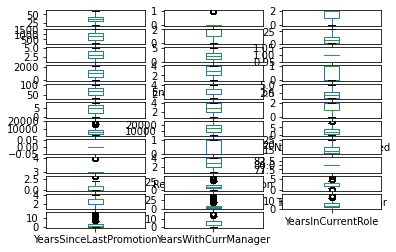

In [27]:

df.plot(kind='box',subplots=True,layout=(12,3))

All the data are categorical so we are not removing outliers

In [28]:
df.describe()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,1.0,2068.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [30]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,NaN,-0.015578,...,-0.035986,NaN,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,NaN,-0.010895,...,-0.022414,NaN,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,NaN,-0.002516,...,-0.004378,NaN,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.015578,-0.050990,-0.010895,0.032916,0.042070,-0.002516,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


<AxesSubplot:>

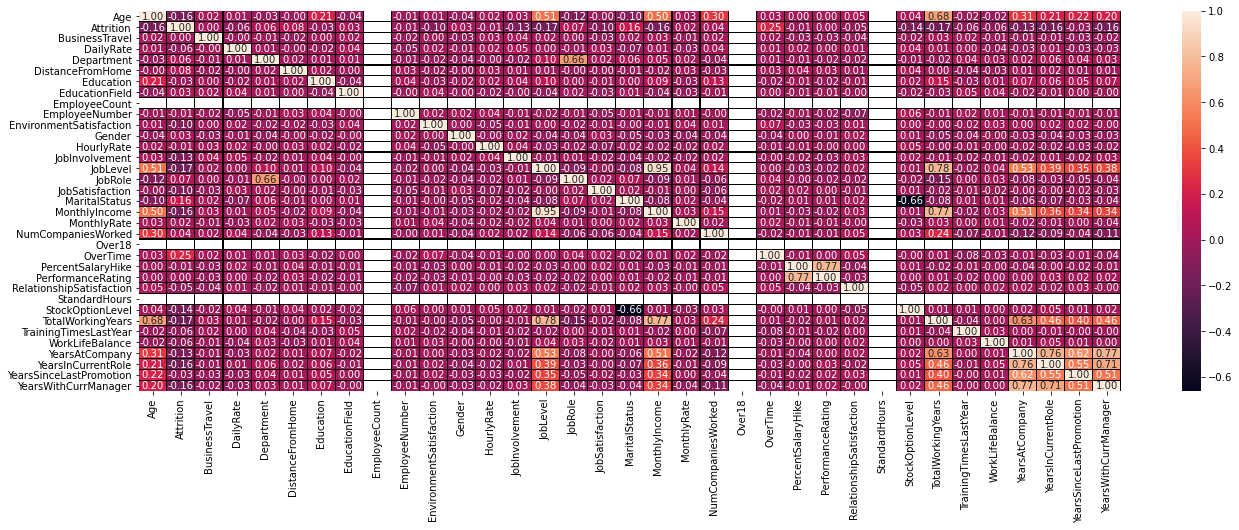

In [31]:
plt.figure(figsize=(22,7))
sn.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

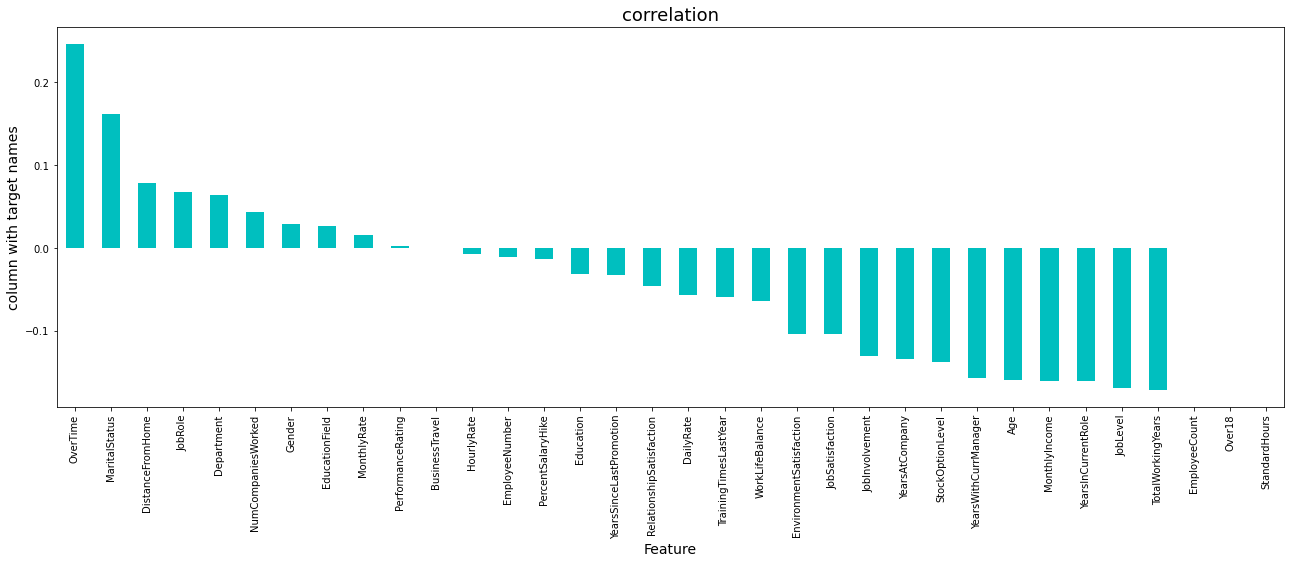

In [32]:
plt.figure(figsize=(22,7))
df.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

There are some positive corelation with overtime ,maritial status ,distance from home with attrition

In [7]:
df.drop(['BusinessTravel','HourlyRate','EmployeeNumber'],axis=1,inplace=True)
df

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,2,1,2,1,1,2,0,...,1,80,0,8,0,1,6,4,0,5
1,49,0,279,1,8,1,1,1,3,1,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1373,1,2,2,4,1,4,1,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1392,1,3,4,1,1,4,0,...,3,80,0,8,3,3,8,7,3,0
4,27,0,591,1,2,1,3,1,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,1,23,2,3,1,3,1,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,613,1,6,1,3,1,4,1,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,155,1,4,3,1,1,2,1,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1023,2,2,3,3,1,4,1,...,4,80,0,17,3,2,9,6,0,8


In [8]:
attri=df.iloc[:,1]
attri

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int32

In [9]:
y=pd.DataFrame(data=attri)

In [10]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


In [11]:
df.drop(['Attrition'],axis=1,inplace=True)
df

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,2,1,2,1,1,2,0,3,...,1,80,0,8,0,1,6,4,0,5
1,49,279,1,8,1,1,1,3,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,1,2,2,4,1,4,1,2,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,1,3,4,1,1,4,0,3,...,3,80,0,8,3,3,8,7,3,0
4,27,591,1,2,1,3,1,1,1,3,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,1,23,2,3,1,3,1,4,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,1,6,1,3,1,4,1,2,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,1,4,3,1,1,2,1,4,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,2,3,3,1,4,1,2,...,4,80,0,17,3,2,9,6,0,8


In [12]:
x=df.iloc[:,0:31]
x

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,2,1,2,1,1,2,0,3,...,1,80,0,8,0,1,6,4,0,5
1,49,279,1,8,1,1,1,3,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,1,2,2,4,1,4,1,2,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,1,3,4,1,1,4,0,3,...,3,80,0,8,3,3,8,7,3,0
4,27,591,1,2,1,3,1,1,1,3,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,1,23,2,3,1,3,1,4,...,3,80,1,17,3,3,5,2,0,3
1466,39,613,1,6,1,3,1,4,1,2,...,1,80,1,9,5,3,7,7,1,7
1467,27,155,1,4,3,1,1,2,1,4,...,2,80,1,6,0,3,6,2,0,3
1468,49,1023,2,2,3,3,1,4,1,2,...,4,80,0,17,3,2,9,6,0,8


In [21]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)
x

array([[ 0.4463504 ,  0.74252653,  1.40151234, ..., -0.0632959 ,
        -0.67914568,  0.24583399],
       [ 1.32236521, -1.2977746 , -0.49381714, ...,  0.76499762,
        -0.36871529,  0.80654148],
       [ 0.008343  ,  1.41436324, -0.49381714, ..., -1.16768726,
        -0.67914568, -1.15593471],
       ...,
       [-1.08667552, -1.60518328, -0.49381714, ..., -0.61549158,
        -0.67914568, -0.31487349],
       [ 1.32236521,  0.54667746,  1.40151234, ...,  0.48889978,
        -0.67914568,  1.08689522],
       [-0.32016256, -0.43256792, -0.49381714, ..., -0.33939374,
        -0.36871529, -0.59522723]])

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [47]:
lg=LogisticRegression()

In [50]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {accuracy_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {accuracy_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 0.8469387755102041
At random state 0,the testing accuracy is:- 0.8367346938775511


At random state 1,the training accuracy is:- 0.8537414965986394
At random state 1,the testing accuracy is:- 0.8095238095238095


At random state 2,the training accuracy is:- 0.842687074829932
At random state 2,the testing accuracy is:- 0.8401360544217688


At random state 3,the training accuracy is:- 0.8384353741496599
At random state 3,the testing accuracy is:- 0.8639455782312925


At random state 4,the training accuracy is:- 0.8392857142857143
At random state 4,the testing accuracy is:- 0.8571428571428571


At random state 5,the training accuracy is:- 0.8392857142857143
At random state 5,the testing accuracy is:- 0.8401360544217688


At random state 6,the training accuracy is:- 0.842687074829932
At random state 6,the testing accuracy is:- 0.8367346938775511


At random state 7,the training accuracy is:- 0.8375850340136054
At random state 7,the testing accur

At random state 63,the testing accuracy is:- 0.8367346938775511


At random state 64,the training accuracy is:- 0.8392857142857143
At random state 64,the testing accuracy is:- 0.8537414965986394


At random state 65,the training accuracy is:- 0.8409863945578231
At random state 65,the testing accuracy is:- 0.8537414965986394


At random state 66,the training accuracy is:- 0.8358843537414966
At random state 66,the testing accuracy is:- 0.8503401360544217


At random state 67,the training accuracy is:- 0.842687074829932
At random state 67,the testing accuracy is:- 0.8401360544217688


At random state 68,the training accuracy is:- 0.8460884353741497
At random state 68,the testing accuracy is:- 0.8197278911564626


At random state 69,the training accuracy is:- 0.8528911564625851
At random state 69,the testing accuracy is:- 0.7993197278911565


At random state 70,the training accuracy is:- 0.8469387755102041
At random state 70,the testing accuracy is:- 0.8129251700680272


At random state 71

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=36)

In [52]:
x_train.shape

(984, 31)

In [53]:
x_test.shape

(486, 31)

In [54]:
y_train.shape

(984, 1)

In [55]:
y_test.shape

(486, 1)

In [56]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.8374485596707819
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       407
           1       0.50      0.09      0.15        79

    accuracy                           0.84       486
   macro avg       0.67      0.54      0.53       486
weighted avg       0.79      0.84      0.79       486



In [57]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.7860082304526749
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       407
           1       0.33      0.30      0.32        79

    accuracy                           0.79       486
   macro avg       0.60      0.59      0.59       486
weighted avg       0.78      0.79      0.78       486



In [23]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.8539094650205762
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       407
           1       0.79      0.14      0.24        79

    accuracy                           0.85       486
   macro avg       0.82      0.57      0.58       486
weighted avg       0.84      0.85      0.81       486



In [59]:
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.8374485596707819
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       407
           1       0.00      0.00      0.00        79

    accuracy                           0.84       486
   macro avg       0.42      0.50      0.46       486
weighted avg       0.70      0.84      0.76       486



In [60]:
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
pred=kn.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.8168724279835391
              precision    recall  f1-score   support

           0       0.84      0.96      0.90       407
           1       0.29      0.09      0.14        79

    accuracy                           0.82       486
   macro avg       0.57      0.52      0.52       486
weighted avg       0.75      0.82      0.77       486



# Cross Validation

In [17]:
from sklearn.model_selection import cross_val_score

In [85]:
print(cross_val_score(lg,x,y,cv=5).mean())

0.8414965986394558


In [86]:
print(cross_val_score(dt,x,y,cv=5).mean())

0.7700680272108843


In [18]:
print(cross_val_score(rf,x,y,cv=5).mean())

0.8591836734693876


In [88]:
print(cross_val_score(svc,x,y,cv=5).mean())

0.8387755102040817


In [89]:
print(cross_val_score(kn,x,y,cv=5).mean())

0.8285714285714286


# AUC ROC Curve

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [74]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
y_pred_prob

array([0.11, 0.05, 0.14, 0.18, 0.27, 0.08, 0.14, 0.05, 0.07, 0.09, 0.07,
       0.16, 0.07, 0.28, 0.18, 0.24, 0.32, 0.5 , 0.09, 0.37, 0.11, 0.5 ,
       0.15, 0.12, 0.04, 0.31, 0.2 , 0.02, 0.17, 0.11, 0.1 , 0.06, 0.28,
       0.02, 0.06, 0.22, 0.24, 0.41, 0.01, 0.15, 0.15, 0.13, 0.27, 0.07,
       0.12, 0.13, 0.08, 0.06, 0.28, 0.01, 0.21, 0.08, 0.03, 0.14, 0.18,
       0.01, 0.17, 0.11, 0.07, 0.21, 0.13, 0.05, 0.09, 0.06, 0.34, 0.11,
       0.04, 0.18, 0.2 , 0.08, 0.04, 0.03, 0.16, 0.18, 0.22, 0.02, 0.  ,
       0.1 , 0.26, 0.06, 0.28, 0.16, 0.03, 0.07, 0.15, 0.03, 0.27, 0.38,
       0.31, 0.37, 0.28, 0.1 , 0.15, 0.09, 0.58, 0.04, 0.1 , 0.04, 0.21,
       0.22, 0.24, 0.2 , 0.3 , 0.25, 0.13, 0.04, 0.  , 0.17, 0.02, 0.14,
       0.49, 0.03, 0.11, 0.11, 0.24, 0.28, 0.16, 0.16, 0.19, 0.2 , 0.03,
       0.55, 0.04, 0.12, 0.27, 0.27, 0.08, 0.1 , 0.31, 0.09, 0.34, 0.07,
       0.19, 0.06, 0.22, 0.07, 0.12, 0.37, 0.11, 0.05, 0.08, 0.08, 0.07,
       0.25, 0.01, 0.62, 0.06, 0.18, 0.07, 0.21, 0.

In [75]:
y_pred_prob.shape

(486,)

In [76]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [77]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.002457  ,
       0.004914  , 0.00982801, 0.01228501, 0.01474201, 0.01719902,
       0.01719902, 0.01965602, 0.01965602, 0.01965602, 0.02211302,
       0.02211302, 0.02457002, 0.02948403, 0.03194103, 0.04176904,
       0.05405405, 0.05896806, 0.06879607, 0.08108108, 0.09090909,
       0.09336609, 0.10565111, 0.11793612, 0.12530713, 0.13759214,
       0.15724816, 0.17444717, 0.21130221, 0.23341523, 0.27027027,
       0.29238329, 0.33169533, 0.35135135, 0.38574939, 0.42260442,
       0.47665848, 0.51351351, 0.56019656, 0.5995086 , 0.63882064,
       0.69287469, 0.75429975, 0.80589681, 0.84520885, 0.89434889,
       0.93611794, 0.97051597, 0.995086  , 1.        ])

In [78]:
tpr

array([0.        , 0.01265823, 0.07594937, 0.10126582, 0.12658228,
       0.12658228, 0.17721519, 0.20253165, 0.20253165, 0.21518987,
       0.24050633, 0.27848101, 0.30379747, 0.32911392, 0.32911392,
       0.34177215, 0.35443038, 0.39240506, 0.39240506, 0.40506329,
       0.46835443, 0.49367089, 0.50632911, 0.50632911, 0.51898734,
       0.5443038 , 0.58227848, 0.60759494, 0.62025316, 0.62025316,
       0.67088608, 0.69620253, 0.70886076, 0.72151899, 0.73417722,
       0.74683544, 0.78481013, 0.82278481, 0.83544304, 0.84810127,
       0.87341772, 0.87341772, 0.88607595, 0.88607595, 0.91139241,
       0.93670886, 0.93670886, 0.94936709, 0.97468354, 0.97468354,
       0.98734177, 1.        , 1.        , 1.        ])

In [79]:
thresholds

array([1.79, 0.79, 0.58, 0.56, 0.55, 0.54, 0.5 , 0.49, 0.48, 0.46, 0.45,
       0.44, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35, 0.34, 0.33,
       0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24, 0.23, 0.22,
       0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.13, 0.12, 0.11, 0.1 ,
       0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.  ])

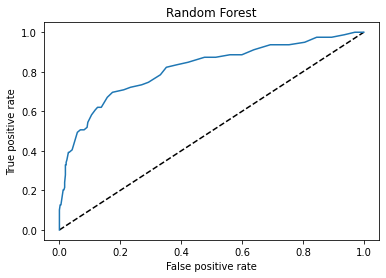

In [81]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest')
plt.show()

In [82]:
auc_score=roc_auc_score(y_test,rf.predict(x_test))

In [83]:
auc_score

0.5608341367835039

# Hyper Parameter Tuning

In [ ]:
parameter = {'n_estimators':[100,200, 400, 600, 800, 1000],'max_depth': [10, 20, 30],'min_samples_split': [2, 5, 10],'min_samples_leaf': [3, 4, 5,6],'max_features'=['auto', 'sqrt']}

In [ ]:
from sklearn.model_selection import GridSearchCV
GV=GridSearchCV(rf,parameter,cv=5)

In [ ]:
GV.fit(x_train,y_train)

In [ ]:
GV.best_params_

In [19]:
rf=RandomForestClassifier(n_estimators=200,max_depth=60,criterion='gini',min_samples_split=5,min_samples_leaf=4,max_features='auto')
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Acuracy_score',accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

Acuracy_score 0.8539094650205762
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       407
           1       0.90      0.11      0.20        79

    accuracy                           0.85       486
   macro avg       0.88      0.56      0.56       486
weighted avg       0.86      0.85      0.80       486



# Saving Model

In [24]:
import pickle
filename = 'HR_Analytic.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [25]:
loaded_model = pickle.load(open('HR_Analytic.pkl', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8539094650205762
